# Importing the libraries

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

# Loading the Data

In [36]:
#Load a sample of the data (10%)
data = pd.read_csv("Flipkart_data.csv").sample(frac=0.1, random_state=42)

In [37]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
193551,BAJAJ 17 L Solo Microwave Oven1701MT White,4498,1,worst experience ever!,not working properly,neutral
149083,ScotchBrite Sponge WipeLarge Pack of 3,189,5,just wow!,very good,positive
194975,limraz furniture Engineered Wood Computer Desk...,1298,5,classy product,it is perfect if you want to work on the compu...,positive
29981,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,simply awesome,thanks flipkart,positive
137259,KENT Aura Portable Room Air PurifierPink,6999,5,simply awesome,thanks product looks good not sure if any inst...,positive


# Visualize the Sentiment Distribution

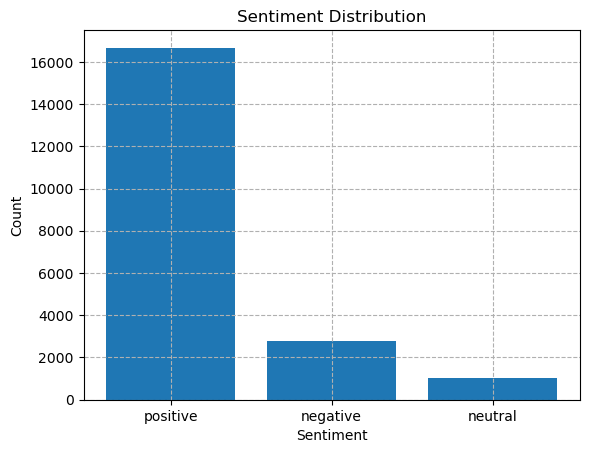

In [38]:
sentiment_counts = data['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Distribution")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(linestyle = "--")
plt.show()

# Visualize the Customers Review Summary using WordCloud

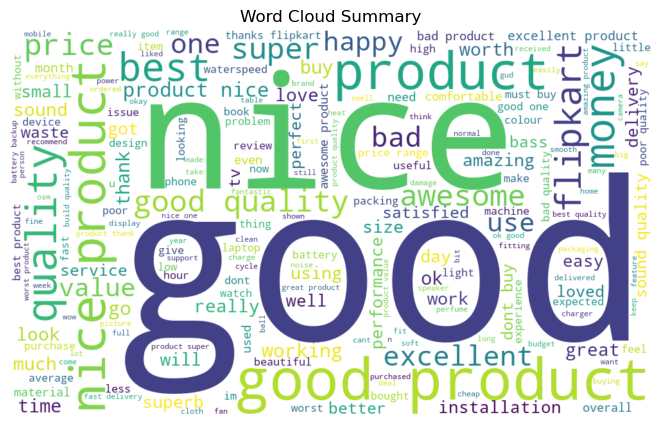

In [45]:
#create a text variable which is basically the text data to be visualized
#matplotlib imshow function is used to visualize the data
text = ' '.join(data['Summary'].dropna())
wordcloud = WordCloud(width = 1000, height=600, background_color ='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Summary')
plt.show()

# Feature Extraction And Split the Data (Train and Split)

In [48]:
#Summary is the predictor column and Sentiment is the target variable
#Split the data into train and test with 80:20 ratio

data = data.dropna()
X = data['Summary']
y = data['Sentiment']

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Vectorization of Text Data

In [49]:
#vectorize the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Training - Multinomial Naive Bayes Classifier

In [60]:
#supplying the training data to initiate the model to learn
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)

MultinomialNB()

In [63]:
#Make predictions using Multinomial Naive Bayes
y_pred_nb = nb_classifier.predict(X_test_counts)
accuracy_nb = accuracy_score(y_test,y_pred_nb)
print("Multinomial Naive Bayes Accuracy : ", accuracy_nb)
print("Multinomial Naive Bayes Classification Report : ")
print(classification_report(y_test,y_pred_nb))

Multinomial Naive Bayes Accuracy :  0.896398891966759
Multinomial Naive Bayes Classification Report : 
              precision    recall  f1-score   support

    negative       0.82      0.63      0.71       464
     neutral       0.78      0.04      0.08       172
    positive       0.90      0.99      0.94      2974

    accuracy                           0.90      3610
   macro avg       0.84      0.55      0.58      3610
weighted avg       0.89      0.90      0.87      3610



# Training - RandomForest

In [64]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_classifier.fit(X_train_counts, y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred_rf = rf_classifier.predict(X_test_counts)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy: ", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test,y_pred_rf))

Random Forest Classifier Accuracy:  0.9274238227146815
Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.78      0.82       464
     neutral       0.67      0.34      0.45       172
    positive       0.95      0.98      0.96      2974

    accuracy                           0.93      3610
   macro avg       0.82      0.70      0.74      3610
weighted avg       0.92      0.93      0.92      3610



# Prediction on New Data

In [66]:
#Naive Bayes 
def predict_sentiment_nb(text):
    text_counts = vectorizer.transform([text])
    prediction = nb_classifier.predict(text_counts)[0]
    return prediction

#Random Forest Classifier
def predict_sentiment_rf(text):
    text_counts = vectorizer.transform([text])
    prediction = rf_classifier.predict(text_counts)[0]
    return prediction

In [83]:
input_text = "really good product"
print("Prediction of Naive Bayes : ",predict_sentiment_nb(input_text))
print("Prediction of Random Forest Classifier : ",predict_sentiment_rf(input_text))

Prediction of Naive Bayes :  positive
Prediction of Random Forest Classifier :  positive
